# Importing Libraries

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

from sklearn.metrics import mean_squared_error, r2_score

# Dataset Description

In [2]:
df = pd.read_csv('/kaggle/input/day-dataset/day.csv')

In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


* No null values exist in the data

Since, there are less number of columns we can explore each one by one.

In [5]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Exploratory Data Analysis

Forming the correlation map now, as later we will convert the columns to string dtype.

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<Axes: >

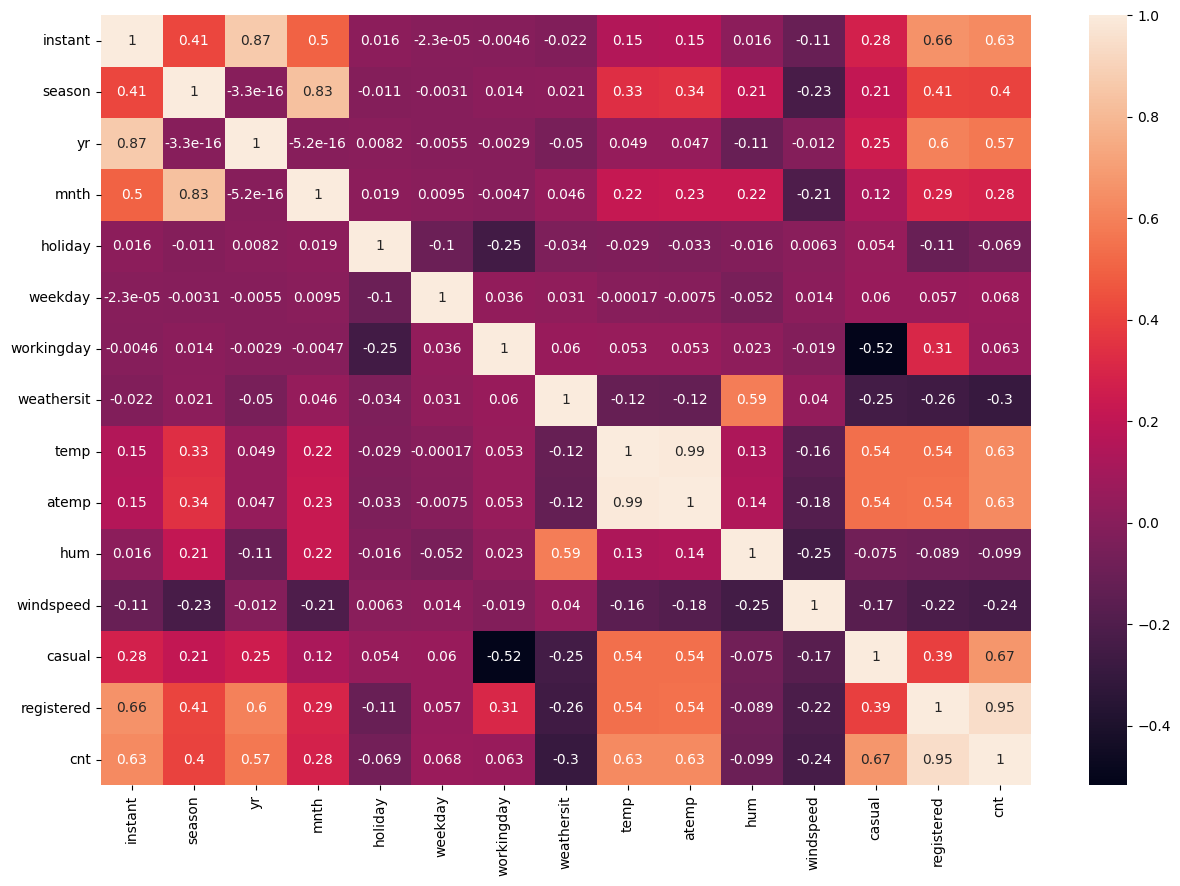

In [7]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.drop(['dteday'], axis = 1).corr(), annot = True)

* high positive correlation between temp and atemp with 0.99
* high positive correlation between season and mnth with 0.83
* high positive correlation between registered and cnt with 0.95
* high negative correlation between weathersit and cnt with -0.3

## instant: record index

In [8]:
df['instant'].nunique()

730

We can drop **'instant'** for model building as it is a index variable and holds unique value for each row.

## dteday : date

In [9]:
df['dteday'].dtype

dtype('O')

Datetime conversion

In [10]:
df['dteday'] = pd.to_datetime(df['dteday'], format = "%d-%m-%Y")

In [11]:
min_value = df['dteday'].min()
min_value

Timestamp('2018-01-01 00:00:00')

In [12]:
max_value = df['dteday'].max()
max_value

Timestamp('2019-12-31 00:00:00')

We have data from '**2018-01-01**' to '**2019-12-31**'.

## season : season (1:spring, 2:summer, 3:fall, 4:winter)

Since, dtype of **season** is int and the values could suggest some order which is not the case. Hence, we will map these values to their labels and create dummy variables at the time of model building. Labels will also be useful for visualization.

In [13]:
df['season'] = df['season'].astype(str)

In [14]:
df['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

## yr : year (0: 2018, 1:2019)

In [15]:
df['yr'] = df['yr'].astype(str)

In [16]:
df['yr'].value_counts()

yr
0    365
1    365
Name: count, dtype: int64

## mnth : month ( 1 to 12)

We will convert the column to **str** dtype.

In [17]:
df['mnth'] = df['mnth'].astype(str)

In [18]:
df['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

## holiday : whether day is a holiday or not

In [19]:
df['holiday'] = df['holiday'].astype(str)

In [20]:
df['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

## weekday : day of the week

In [21]:
df['weekday'] = df['weekday'].astype(str)

In [22]:
df['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

## workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

In [23]:
df['workingday'] = df['workingday'].astype(str)

In [24]:
df['workingday'].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

## weathersit : 

		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [25]:
df['weathersit'] = df['weathersit'].astype(str)

In [26]:
df['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

No data related to the **4** type.

## temp : temperature in Celsius

In [27]:
df['temp'].describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

## atemp: feeling temperature in Celsius

In [28]:
df['atemp'].describe()

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
max       42.044800
Name: atemp, dtype: float64

## hum: humidity

In [29]:
df['hum'].describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

## windspeed: wind speed

In [30]:
df['windspeed'].describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

## casual: count of casual users

Indicates the number casual users who have made a rental

In [31]:
df['casual'].describe()

count     730.000000
mean      849.249315
std       686.479875
min         2.000000
25%       316.250000
50%       717.000000
75%      1096.500000
max      3410.000000
Name: casual, dtype: float64

## registered: count of registered users

The total number of registered users who have made a booking on a given day

In [32]:
df['registered'].describe()

count     730.000000
mean     3658.757534
std      1559.758728
min        20.000000
25%      2502.250000
50%      3664.500000
75%      4783.250000
max      6946.000000
Name: registered, dtype: float64

## cnt: count of total rental bikes including both casual and registered

Target Variable

In [33]:
df['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [35]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [36]:
num_cols = [col for col in df.columns if df[col].dtype != 'O']
num_cols.remove('instant')
num_cols.remove('dteday')
num_cols.remove('cnt')
num_cols

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

## categorical columns v/s cnt

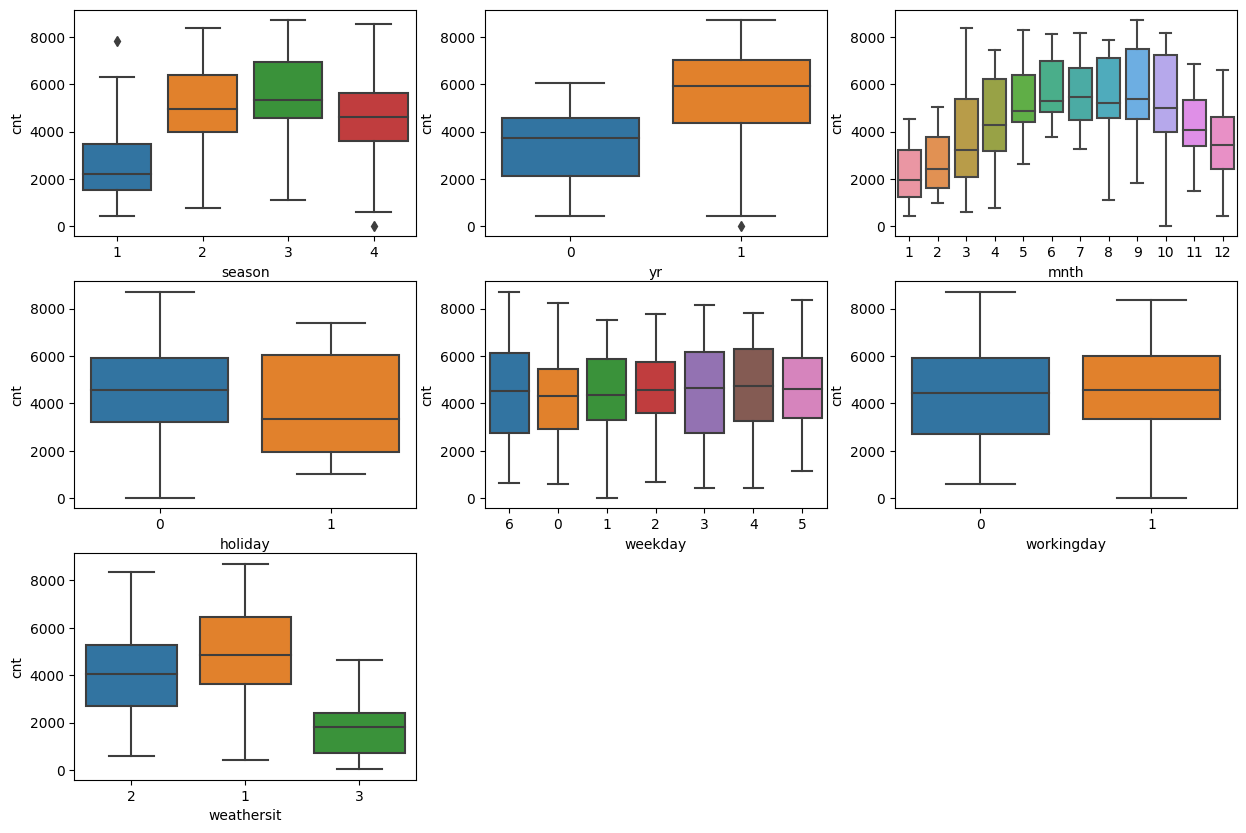

In [37]:
plt.figure(figsize = (15, 10))
for i,col in enumerate(cat_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x = col, y = 'cnt', data = df)

* We have outliers in season and yr attribute.
* count is least in spring season
* count increases from 2018 to 2019. We have one outlier in 2019 where sales is too less. maybe it was the start of pandemic. 
* count keeps on increasing from the start of year and then decreases at the end of the year.
* count median is lower on holidays than non-holidays.
* count distribution is almost similar for all weekdays.
* count distribution is almost similar for both working day and non-working day.
* count is least for 3 of weathersit

## numerical columns v/s cnt

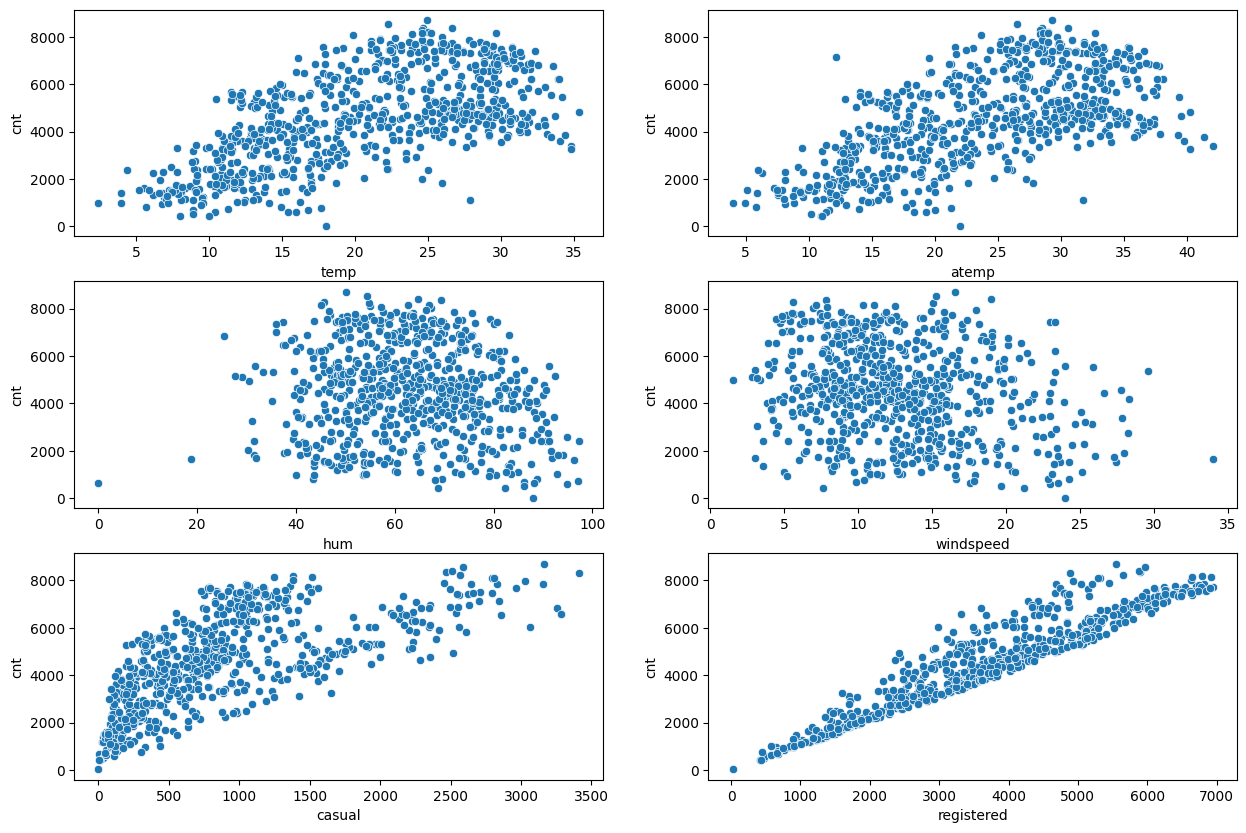

In [38]:
plt.figure(figsize = (15, 10))
for i,col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(x = col, y = 'cnt', data = df)

* weak linear relationship exists between temp,atemp and cnt
* no linear relationship exists between hum,windspeed and cnt
* strong linear relationship exist between casual,registered and cnt

# Outlier Analysis

### yr column

In [39]:
df_2019 = df[df['yr'] == '1']

In [40]:
q1 = np.percentile(df_2019['cnt'], 25)
q3 = np.percentile(df_2019['cnt'], 75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
lower_limit

418.0

In [41]:
df_2019[df_2019['cnt'] < lower_limit]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
666,667,2019-10-29,4,1,10,0,1,1,3,18.04,21.97,88.0,23.9994,2,20,22


### season column

In [42]:
df_spring = df[df['season'] == '1']

In [43]:
q1 = np.percentile(df_spring['cnt'], 25)
q3 = np.percentile(df_spring['cnt'], 75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
upper_limit

6355.375

In [44]:
df_spring[df_spring['cnt'] > upper_limit]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
440,441,2019-03-17,1,1,3,0,6,0,2,21.080847,25.2523,75.5833,7.417168,3155,4681,7836


In [45]:
df_winter = df[df['season'] == '4']

In [46]:
q1 = np.percentile(df_winter['cnt'], 25)
q3 = np.percentile(df_winter['cnt'], 75)
iqr = q3 - q1
lower_limit = q1 - 1.5*iqr
lower_limit

602.0

In [47]:
df_winter[df_winter['cnt'] < lower_limit]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
666,667,2019-10-29,4,1,10,0,1,1,3,18.04,21.97,88.0,23.9994,2,20,22


In [48]:
df.describe()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,1.000000,2018-01-01 00:00:00,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018-07-02 06:00:00,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018-12-31 12:00:00,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019-07-01 18:00:00,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019-12-31 00:00:00,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,210.877136,NaN,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


* outliers are natural variations.

# Data Preparation

We will drop these below columns -

* **instant**- index variable  
* **dteday** - date, as we have already have date features (yr, mnth, weekday)

In [49]:
df.drop(['instant', 'dteday'], axis = 1, inplace = True)

df_copy - we will use for the final model

In [50]:
df_copy = df.copy()

In [51]:
df_copy.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Create Dummy Variables

In [52]:
cat_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [53]:
df = pd.concat([df, pd.get_dummies(df[cat_cols], drop_first = True).astype(int)], axis = 1)

In [54]:
df.drop(cat_cols, axis = 1, inplace = True)

In [55]:
df.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,season_4,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# Train-Test Split

In [56]:
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 8)

In [57]:
df_train.shape

(511, 32)

In [58]:
df_test.shape

(219, 32)

# Feature Scaling

In [59]:
num_cols

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

In [60]:
scaler = MinMaxScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

# Recursive Feature Elimination

In [61]:
X_train = df_train.drop(['cnt'], axis = 1)
y_train = df_train['cnt']

X_test = df_test.drop(['cnt'], axis = 1)
y_test = df_test['cnt']

Checking r2 score and rmse by taking each variable at a time

In [62]:
r2_score_dict = {}
rmse_dict = {}

for i in range(len(X_train.columns)):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select = i + 1)
    rfe.fit(X_train, y_train)
    selected_features = X_train.columns[rfe.support_]
    
    X_train_rfe = X_train[selected_features]
    X_test_rfe = X_test[selected_features]

    model.fit(X_train_rfe, y_train)

    y_pred = model.predict(X_test_rfe)
    
    r2_score_dict[i + 1] = r2_score(y_test, y_pred)
    rmse_dict[i + 1] = np.sqrt(mean_squared_error(y_test, y_pred))

In [63]:
r2_score_dict

{1: 0.8841743837281003,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 1.0,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 1.0,
 24: 1.0,
 25: 1.0,
 26: 1.0,
 27: 1.0,
 28: 1.0,
 29: 1.0,
 30: 1.0,
 31: 1.0}

In [64]:
rmse_dict

{1: 678.7883712425985,
 2: 1.0958311906607022e-12,
 3: 1.3282065445134462e-12,
 4: 9.709609545049971e-13,
 5: 1.4788869515077213e-12,
 6: 1.4220714536344335e-12,
 7: 2.202075573444843e-12,
 8: 1.8223605465400128e-12,
 9: 1.6476444674426742e-12,
 10: 1.935910388540669e-12,
 11: 2.5656741720568937e-12,
 12: 1.640447049304395e-12,
 13: 2.487908869424862e-12,
 14: 2.550239080865655e-12,
 15: 3.382888411294608e-12,
 16: 2.268360772384548e-12,
 17: 2.0224338680472397e-12,
 18: 2.2018779103662362e-12,
 19: 2.4962034909289878e-12,
 20: 3.312366139484505e-12,
 21: 3.622457324169159e-12,
 22: 2.7944263614115387e-12,
 23: 3.7141884813228e-12,
 24: 5.535702247668585e-12,
 25: 3.515155791517535e-12,
 26: 2.771004358009972e-12,
 27: 2.8447471962058776e-12,
 28: 3.432115304989882e-12,
 29: 4.115260175389135e-12,
 30: 2.2761104801370787e-12,
 31: 3.198264286268552e-12}

# Final Model

In [65]:
# selected features
df_copy = df_copy[['yr', 'registered', 'casual', 'temp', 'cnt', 'season', 'workingday', 'weathersit']]

In [66]:
cat_cols = ['yr', 'season', 'workingday', 'weathersit']

In [67]:
df_copy = pd.concat([df_copy, pd.get_dummies(df_copy[cat_cols], drop_first = True).astype(int)], axis = 1)

In [68]:
df_copy.drop(cat_cols, axis = 1, inplace = True)

In [69]:
df_copy.head()

,registered,casual,temp,cnt,yr_1,season_2,season_3,season_4,workingday_1,weathersit_2,weathersit_3
0,654,331,14.110847,985,0,0,0,0,0,1,0
1,670,131,14.902598,801,0,0,0,0,0,1,0
2,1229,120,8.050924,1349,0,0,0,0,1,0,0
3,1454,108,8.200000,1562,0,0,0,0,1,0,0
4,1518,82,9.305237,1600,0,0,0,0,1,0,0


In [70]:
df_train, df_test = train_test_split(df_copy, test_size = 0.3, random_state = 8)

In [71]:
num_cols = ['registered', 'casual', 'temp']

In [72]:
scaler = MinMaxScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [73]:
X_train = df_train.drop(['cnt'], axis = 1)
y_train = df_train['cnt']

X_test = df_test.drop(['cnt'], axis = 1)
y_test = df_test['cnt']

In [74]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [75]:
y_train_pred = lr_model.predict(X_train)

In [76]:
print(r2_score(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.0
1.14630956687962e-12


Assessing the model using stats module

In [77]:
X_train_lm = sm.add_constant(X_train)

lm = sm.OLS(y_train,X_train_lm).fit()

In [78]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.633e+31
Date:                Wed, 30 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:28:12   Log-Likelihood:                 13045.
No. Observations:                 511   AIC:                        -2.607e+04
Df Residuals:                     500   BIC:                        -2.602e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   3.26e-13   6.74e+13   

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,registered,41.19
2,temp,25.54
7,workingday_1,9.08
1,casual,8.82
5,season_3,5.68
3,yr_1,5.60
4,season_2,3.69
6,season_4,3.34
8,weathersit_2,1.59
9,weathersit_3,1.31


# Residual Analysis

In [80]:
residuals = y_train - y_train_pred

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cnt', ylabel='Count'>

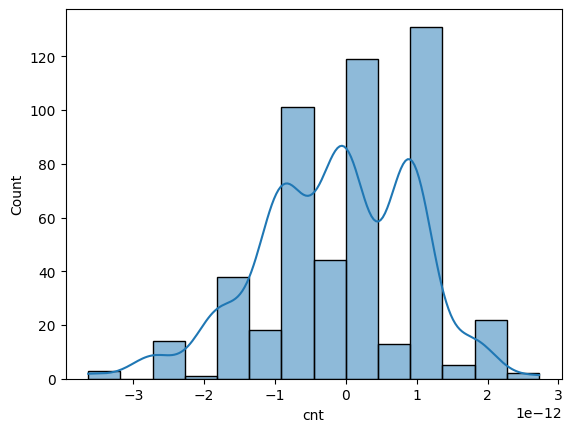

In [81]:
sns.histplot(residuals, kde = True)

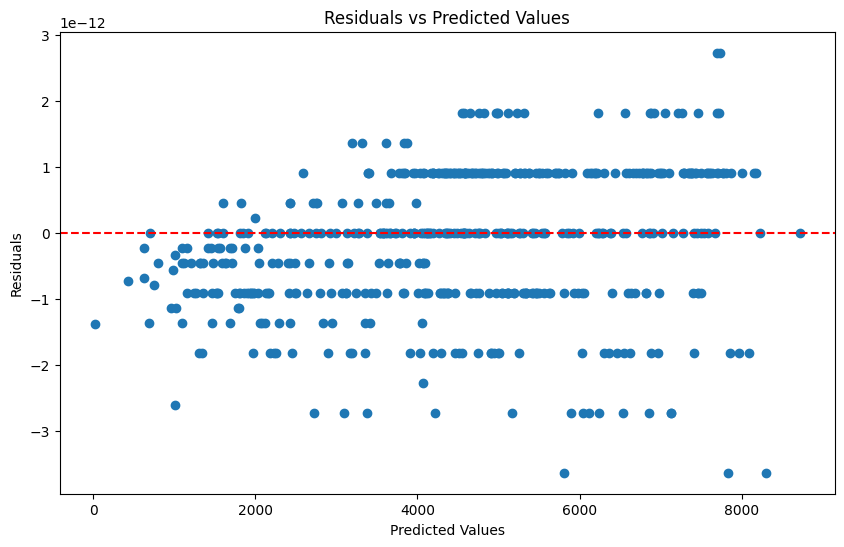

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()